# Clustering RNA sequences to identify cancer types

In this assignment, we will use clustering algorithms on RNA sequence data to identify cancer types.
Since the [whole data](https://www.synapse.org/#!Synapse:syn4301332) (from [Cancer Genome Atlas Pan-Cancer project](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3919969/)) is very big, we will use a [subset data from UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#). The subset data contains only 5 labels; BRCA, KIRC, COAD, LUAD and PRAD. The meanings of those labels are as below.

|Abbreviation|Cancer|
|:----:|:-------:|
|LUSC|Lung squamous cell carcinoma |
|READ |Rectum adenocarcinoma |
|GBM |Glioblastoma multiforme|
|BLCA |Bladder Urothelial Carcinoma|
|UCEC |Uterine Corpus Endometrioid Carcinoma|
|COAD |Colon adenocarcinoma|
|OV |Ovarian serous cystadenocarcinoma|
|LAML |Acute Myeloid Leukemia|
|HNSC |Head and Neck squamous cell carcinoma|
|LUAD |Lung adenocarcinoma|
|BRCA |Breast invasive carcinoma|
|KIRC |Kidney renal clear cell carcinoma|

Although we can use the data for supervised learning model training, we will not use these labels for training, but use them for evaluation.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.optimize import linear_sum_assignment
import itertools
import time

In [91]:
# Read data. Do not change the variable names (data, label)
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

### A. Perform basic data inspection or EDA on the pandas dataframe.
- How many observations?
- How many features?
- If we were to train a "supervised" learning model, how would you deal with such large feature dimension? 
- Even after feature dimension reduction, still the number of useful features may be enormous. How it would impact performance or runtime of certain supervised learning algorithms? Which algorithms would suffer from high dimension features than others and why? 
- How it would impact performance or runtime of an unsupervised learning algorithm?
- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.)

Number of observations (rows): 801
Number of features (columns): 20531
To deal with such a large number of features, we can use dimensionality reduction techniques to deal with this.
The algorithms that would suffer from high dimensions are the ones that are distance based, such as K-means. 
This could negatively impact the performance of the model by making it less accurate.
The unsupervised learning algorithms that are not distance based, such as PCA, would not be affected by the high number of dimensions.


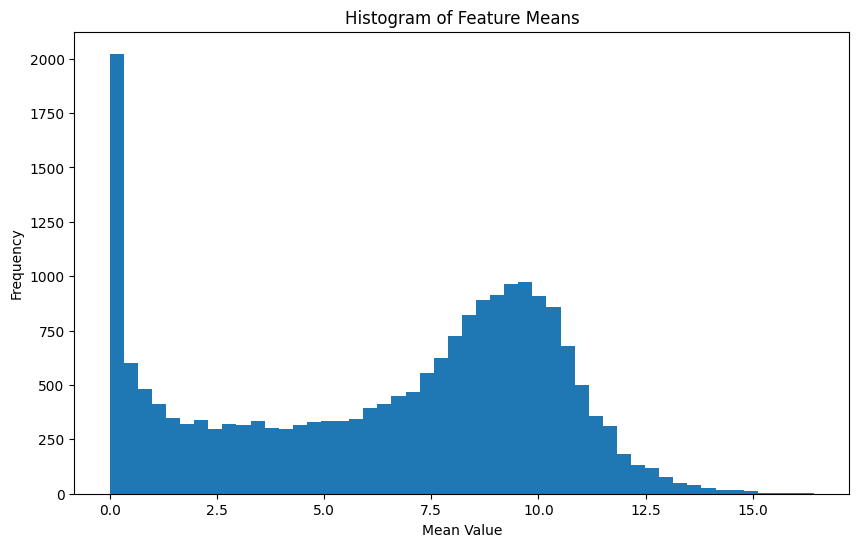

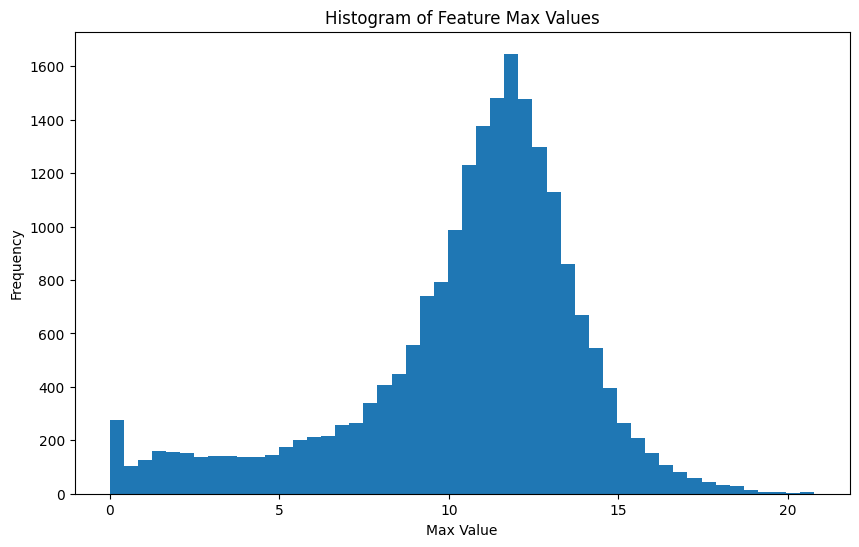

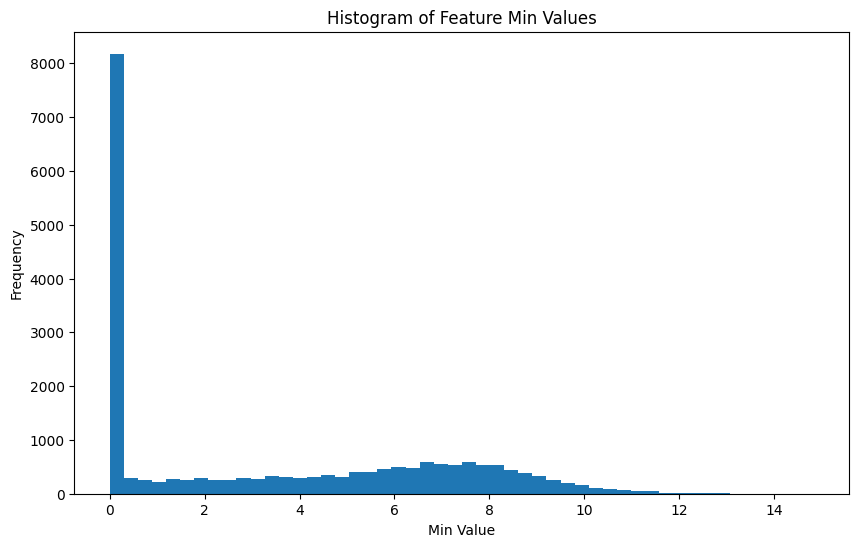

In [92]:
# YOUR CODE HERE

print("Number of observations (rows):", data.shape[0])
print("Number of features (columns):", data.shape[1])

print("To deal with such a large number of features, we can use dimensionality reduction techniques to deal with this.")
print("The algorithms that would suffer from high dimensions are the ones that are distance based, such as K-means. \nThis could negatively impact the performance of the model by making it less accurate.")
print("The unsupervised learning algorithms that are not distance based, such as PCA, would not be affected by the high number of dimensions.")

feature_means = data.mean()
feature_maxes = data.max()
feature_mins = data.min()

# Mean values histogram
plt.figure(figsize=(10, 6))
plt.hist(feature_means, bins=50)
plt.title('Histogram of Feature Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

# Max values histogram
plt.figure(figsize=(10, 6))
plt.hist(feature_maxes, bins=50)
plt.title('Histogram of Feature Max Values')
plt.xlabel('Max Value')
plt.ylabel('Frequency')
plt.show()

# Min values histogram
plt.figure(figsize=(10, 6))
plt.hist(feature_mins, bins=50)
plt.title('Histogram of Feature Min Values')
plt.xlabel('Min Value')
plt.ylabel('Frequency')
plt.show()

### B. Build a hierarchical clustering model 
Let's build a model using hierarchical clustering. Hierarchical clustering module is available from  `sklearn.cluster.AgglomerativeClustering`. You can choose linkage type and metric. Please check its documentation for more details.

#### a) Number of clusters vs distance threshold
Ofterntimes hierarchical clustering does not need to know the number of clusters in advance. Instead, one needs to choose threshold distance/similarity to cut the dendrogram later.  The `AgglomerativeClustering` module lets you specify either the number of clusters (`n_clusters`) or the threshold (`distance_threshold`). Based on our data, which should we choose to set to which value and why?

Here is a dendogram that shows the hierarchical clustering of the data. The dendogram shows the distance between each data point and the clusters that are formed. The height of the dendogram shows the distance between the clusters. The dendogram can be used to determine the number of clusters that should be created.


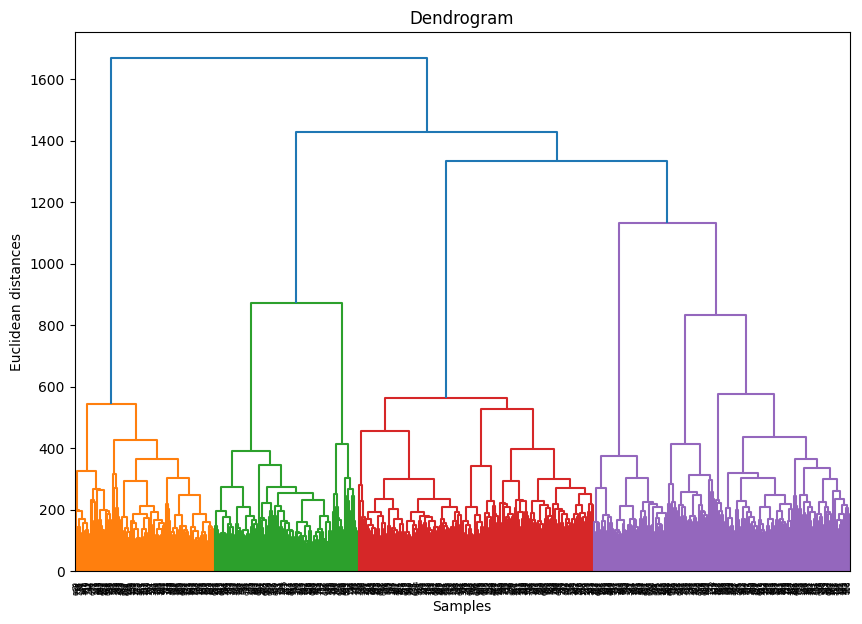

When picking between distance_threshold and n_clusters, we should choose distance_threshold when we have a good idea of the number of clusters we want to create. 
If we don't have a good idea of the number of clusters, we should choose n_clusters.


In [93]:
# YOUR CODE HERE

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

print("Here is a dendogram that shows the hierarchical clustering of the data. The dendogram shows the distance between each data point and the clusters that are formed. The height of the dendogram shows the distance between the clusters. The dendogram can be used to determine the number of clusters that should be created.")

# Dendogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Choice from dendogram
distance_threshold = 5

# Build the hierarchical clustering model
hc_model = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, linkage='ward')
hc_model.fit(scaled_features)

print("When picking between distance_threshold and n_clusters, we should choose distance_threshold when we have a good idea of the number of clusters we want to create. \nIf we don't have a good idea of the number of clusters, we should choose n_clusters.")

#### b) Guess which metric?
Can you guess which metric to use (distance-based vs. similarity-based) and why? Share your thoughts with the class.

In [94]:
print("Similarity based metrics should be used for high-dimensional data. Distance-based metrics should be used for more continuous data.")

Similarity based metrics should be used for high-dimensional data. Distance-based metrics should be used for more continuous data.


#### c) Build a model
Build a model using n_clusters=5 option. Choose any metric and linkage type at first. Display the clustering result labels (you can just print out the result). Do not change the variable (model) name.

In [95]:
# YOUR CODE HERE

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
model.fit(scaled_features)
labels = model.labels_
print(f"Cluster labels: {labels}")


Cluster labels: [0 2 2 0 1 0 3 0 2 0 1 3 0 0 1 1 2 3 3 0 1 3 2 1 3 2 4 1 2 2 1 1 3 0 0 1 3
 2 1 0 3 0 0 3 3 1 0 4 1 2 1 2 2 0 4 2 1 4 3 1 2 3 1 2 0 4 1 0 3 2 3 1 1 2
 2 2 1 3 0 4 1 0 1 1 0 0 1 1 3 2 0 0 1 0 1 0 4 1 0 1 1 3 1 3 2 3 2 4 2 2 0
 1 2 0 1 3 3 3 1 1 2 3 2 1 0 0 0 1 3 2 4 2 4 1 1 3 2 1 3 4 1 0 1 3 2 4 0 1
 2 2 2 2 1 1 2 1 1 0 0 2 0 2 3 1 0 2 4 3 2 1 3 2 1 2 1 1 1 0 1 3 4 3 1 0 0
 0 2 2 1 2 2 3 2 0 2 1 0 1 2 2 1 3 3 3 3 0 2 0 1 2 2 1 0 1 0 1 1 1 2 1 3 2
 3 3 2 1 3 0 1 2 0 0 4 0 3 0 3 4 2 3 3 2 0 1 2 2 3 1 2 4 2 0 4 1 0 3 0 0 0
 1 4 4 2 4 4 0 2 2 1 3 3 1 4 0 3 0 1 1 3 1 2 2 0 2 2 1 1 1 3 3 3 3 0 1 1 3
 1 1 2 0 1 1 4 2 0 1 1 1 4 1 0 1 4 2 2 0 3 1 3 3 1 4 3 1 1 2 2 3 1 1 0 2 3
 1 2 0 3 1 0 4 1 1 1 2 2 2 1 1 0 2 1 3 1 4 4 2 1 3 1 1 1 4 2 4 3 0 3 1 1 3
 2 4 0 2 0 0 3 0 1 4 3 3 4 4 0 1 1 4 3 0 0 2 1 1 2 2 1 2 2 3 4 0 1 2 0 1 2
 1 2 1 2 0 1 0 4 1 2 1 2 2 1 1 1 3 2 0 1 0 3 1 3 4 1 0 2 3 1 1 3 1 2 2 2 0
 4 1 3 2 0 1 0 1 1 2 1 3 2 1 3 1 1 2 2 3 4 0 4 1 3 3 1 0 3 4 2 2 1 0 0 2 0
 2 3 0 1 

#### d) Label permuation
In clustering, the labels get assigned randomly, so the label numbering won't match the ground truth necessarily. Write a function below to find best matching label ordering based on the accuracy. Do not change the variable names.

**Note**: Label order is ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'] as 0,1,2,3,4. So PRAD is 0, LUAD is 1, etc.
This part asks you to rematch the labels from your model. The clustering model does not know which label is which, but will give you 5 numeric labels (0-4). You'll need to find out which label correspond to which of the data set label.

In [96]:
def label_permute_compare(ytdf, yp, n=5):
    # Extract true labels
    true_labels = ytdf.values.flatten()
    true_label_order = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
    true_label_mapping = {label: i for i, label in enumerate(true_label_order)}
    # Map true labels to numeric values
    true_labels_numeric = np.array([true_label_mapping[label] for label in true_labels])
    # Get unique labels from clustering results
    unique_labels = np.unique(yp)
    # Generate all permutations of the unique cluster labels
    permutations = list(itertools.permutations(unique_labels))
    best_permutation = None
    best_accuracy = 0
    # Iterate over each permutation
    for perm in permutations:
        # Create a mapping from the original cluster labels to the permuted labels
        label_mapping = {unique_labels[i]: perm[i] for i in range(len(perm))}
        # Apply the mapping to the predicted labels
        permuted_labels = np.array([label_mapping[label] for label in yp])
        # Calculate accuracy
        accuracy = np.mean(permuted_labels == true_labels_numeric)
        # Update best permutation and accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_permutation = perm
    return best_permutation, best_accuracy


In [97]:
labelorder, acc = label_permute_compare(label, model.labels_)
print(labelorder, acc)

(0, 2, 1, 3, 4) 0.916354556803995


#### e) Check confusion matrix
Use sklearn's confusion matrix and display the results. 

In [98]:
# YOUR CODE HERE

ytdf = pd.DataFrame(['PRAD', 'LUAD', 'BRCA', 'LUAD', 'PRAD'])
yp = np.array([2, 0, 1, 0, 2])  
# Best permutation
best_permutation, best_accuracy = label_permute_compare(ytdf, yp)
# Apply the best permutation
label_mapping = {i: best_permutation[i] for i in range(len(best_permutation))}
permuted_labels_numeric = np.array([label_mapping[label] for label in yp])
# Convert numeric permuted
true_label_order = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
permuted_labels = np.array([true_label_order[label] for label in permuted_labels_numeric])
# Generate the confusion matrix
conf_matrix = confusion_matrix(ytdf.values.flatten(), permuted_labels)
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1 0 0]
 [0 2 0]
 [0 0 2]]


#### f) Change linkage method and distance metric. Which ones lead the best performance? Print out the accuracy and confusion matrix for the best model.

In [99]:
# YOUR CODE HERE

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
# Encode the true labels as integer values for easier evaluation
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(label)
# Define the different linkage methods and distance metrics we want to evaluate
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'manhattan', 'cosine']
# Initialize variables to store the best model's results
best_accuracy = 0
best_confusion_matrix = None
best_linkage = None
best_metric = None
best_labels = None
# Determine the number of clusters by the number of unique labels
n_clusters = len(np.unique(y_true_encoded))
# Iterate over each combination of linkage method and distance metric
for linkage in linkage_methods:
    for metric in distance_metrics:
        # Skip invalid combinations: 'ward' linkage only works with 'euclidean' metric
        if linkage == 'ward' and metric != 'euclidean':
            continue
        print(f"Evaluating linkage='{linkage}', metric='{metric}'")
        # Special handling for cosine metric
        if metric == 'cosine':
            # Calculate cosine similarity and convert it to cosine distance
            cosine_sim = cosine_similarity(X_scaled)
            distance_matrix = 1 - cosine_sim
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='precomputed')
            model.fit(distance_matrix)
        else:
            # Use other metrics directly with AgglomerativeClustering
            model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            model.fit(X_scaled)
        # Get the predicted cluster labels
        y_pred = model.labels_
        # Map predicted cluster labels to the true labels for meaningful evaluation
        contingency_matrix = confusion_matrix(y_true_encoded, y_pred)
        row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
        label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
        y_pred_mapped = np.array([label_mapping[label] for label in y_pred])
        # Calculate accuracy and the confusion matrix for this model
        accuracy = accuracy_score(y_true_encoded, y_pred_mapped)
        conf_matrix = confusion_matrix(y_true_encoded, y_pred_mapped)
        # Update best model details if the current model performs better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_confusion_matrix = conf_matrix
            best_linkage = linkage
            best_metric = metric
            best_labels = y_pred_mapped

# Print out the best model's accuracy and confusion matrix
print(f"\nBest Linkage Method: {best_linkage}")
print(f"Best Distance Metric: {best_metric}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print("Confusion Matrix:")
print(best_confusion_matrix)

Evaluating linkage='ward', metric='euclidean'


/Users/taylor/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluating linkage='complete', metric='euclidean'
Evaluating linkage='complete', metric='manhattan'
Evaluating linkage='complete', metric='cosine'
Evaluating linkage='average', metric='euclidean'
Evaluating linkage='average', metric='manhattan'
Evaluating linkage='average', metric='cosine'
Evaluating linkage='single', metric='euclidean'
Evaluating linkage='single', metric='manhattan'
Evaluating linkage='single', metric='cosine'

Best Linkage Method: ward
Best Distance Metric: euclidean
Best Accuracy: 0.9164
Confusion Matrix:
[[239   0   0  47  14]
 [  0  77   0   1   0]
 [  1   0 145   0   0]
 [  1   0   0 139   1]
 [  1   0   0   1 134]]


### C. What about k-means clustering?
Can we apply kmeans clustering on this data? Which clustering methods give a better performance? Is kmeans faster or slower?

In [100]:
# YOUR CODE HERE

print("Yes, we could apply K-Means clustering on this data. In regards to the performance, it is expected that K-means would actually perform better than hierarchical clustering. \nThis is because K-means is more efficient and faster than hierarchical clustering. \nK-means is also more scalable than hierarchical clustering. \nHowever, K-means is sensitive to the initial cluster centers, which could lead to different results each time the algorithm is run. \nHierarchical clustering is more robust and stable than K-means, but it is slower and less scalable.")

Yes, we could apply K-Means clustering on this data. In regards to the performance, it is expected that K-means would actually perform better than hierarchical clustering. 
This is because K-means is more efficient and faster than hierarchical clustering. 
K-means is also more scalable than hierarchical clustering. 
However, K-means is sensitive to the initial cluster centers, which could lead to different results each time the algorithm is run. 
Hierarchical clustering is more robust and stable than K-means, but it is slower and less scalable.
